In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('flats.csv')
df.head()

,price,dist1,dist2,dist3,rooms,square,floor,type1,type2,type3,metro
0,26 000 грн,ЖК Місце мрії,Шулявка,Солом'янський,2 кімнати,60 / 35 / 15 м²,поверх 14 з 25,спец. проект,монолітно-каркасний,2009.0,1
1,95 750 грн,ЖК Central Park,Нова забудова,Печерський,3 кімнати,131 / 80 / 15 м²,поверх 10 з 25,NaN,NaN,NaN,1
2,57 450 грн,ЖК Новопечерські Липки,Чорна Гора,Печерський,2 кімнати,87 / 41 / 17 м²,поверх 2 з 23,спец. проект,монолітно-каркасний,2013.0,1
3,8 000 грн,Харьківський,Дарницький,Київ,1 кімната,40 / 18 / 9 м²,поверх 3 з 16,серія Т,утеплена панель,1983.0,1
4,15 000 грн,ЖМ Патріотика,Осокорки,Дарницький,1 кімната,38 / 12 / 16 м²,поверх 15 з 25,спец. проект,панельні,2018.0,1


### Data cleaning and exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17748 entries, 0 to 17747
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   price   17748 non-null  object
 1   dist1   17748 non-null  object
 2   dist2   17639 non-null  object
 3   dist3   16614 non-null  object
 4   rooms   17748 non-null  object
 5   square  17748 non-null  object
 6   floor   17748 non-null  object
 7   type1   15045 non-null  object
 8   type2   13784 non-null  object
 9   type3   14578 non-null  object
 10  metro   17748 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1.5+ MB


### Null values

In [324]:
df.isna().sum()

price        0
dist1        0
dist2      109
dist3     1134
rooms        0
square       0
floor        0
type1     2703
type2     3964
type3     3170
metro        0
dtype: int64

### Duplicates

In [325]:
df[df.duplicated(subset=['price', 'dist1', 'dist2', 'dist3', 'rooms', 'square', 'floor', 'type1', 'type2', 'type3'])]

,price,dist1,dist2,dist3,rooms,square,floor,type1,type2,type3,metro
8780,38 000 грн,ЖК Французький квартал 2,Нова забудова,Печерський,2 кімнати,64 / 28 / 24 м²,поверх 8 з 24,спец. проект,монолітно-каркасний,2017.0,1
8783,28 725 грн,ЖК Французький квартал 2,Нова забудова,Печерський,1 кімната,41 / 20 / 20 м²,поверх 14 з 24,спец. проект,монолітно-каркасний,2017.0,1
8792,17 000 грн,Липки,Печерський,Київ,1 кімната,40 / 20 / 5 м²,поверх 1 з 5,сталінка,цегляний будинок,1962.0,1
8820,24 000 грн,ЖК Нивки-Парк,Ґалаґани,Святошинський,2 кімнати,72 / 40 / 20 м²,поверх 9 з 18,спец. проект,монолітно-каркасний,2021.0,1
8831,19 900 грн,Нижній Печерськ,Печерський,Київ,2 кімнати,52 / 20 / 25 м²,поверх 17 з 18,совмін,цегляний будинок,1974.0,1
...,...,...,...,...,...,...,...,...,...,...,...
12028,42 130 грн,Поділ,Подільський,Київ,3 кімнати,75 / - / 12 м²,поверх 3 з 4,дореволюційний,цегляний будинок,1917.0,1
12029,107 240 грн,ЖК Crystal Park,Шулявка,Шевченківський,4 кімнати,160 / - / 37 м²,поверх 8 з 9,спец. проект,монолітно-каркасний,2013.0,1
12054,16 000 грн,"ЖК вул. Каховська, 60",Микільська Слобідка,Дніпровський,1 кімната,31 / 15 / 12 м²,поверх 5 з 26,цегляний будинок,2020,сьогодні о 10:24,0
12559,19 000 грн,"ЖК вул. Дмитрівська, 69",Солдатська слобідка,Шевченківський,1 кімната,55 / - / 15 м²,поверх 8 з 24,спец. проект,монолітно-каркасний,вчора о 13:30,0


In [326]:
df.drop_duplicates(subset=['price', 'dist1', 'dist2', 'dist3', 'rooms', 'square', 'floor', 'type1', 'type2', 'type3'],
                   inplace=True, ignore_index=True)

### Data cleaning

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   price   15547 non-null  object
 1   dist1   15547 non-null  object
 2   dist2   15453 non-null  object
 3   dist3   14504 non-null  object
 4   rooms   15547 non-null  object
 5   square  15547 non-null  object
 6   floor   15547 non-null  object
 7   type1   13101 non-null  object
 8   type2   11979 non-null  object
 9   type3   12855 non-null  object
 10  metro   15547 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1.3+ MB


In [328]:
df.dist3.value_counts()

dist3
Київ              7518
Печерський        2357
Голосіївський     1165
Дарницький         934
Шевченківський     768
Солом'янський      464
Дніпровський       449
Оболонський        303
Подільський        291
Святошинський      193
Деснянський         62
Name: count, dtype: int64

In [329]:
df.dist3 = df.dist3.apply(lambda x : np.nan if x=='Київ' else x)

In [330]:
districts = ['Печерський', 'Деснянський', 'Шевченківський', 'Дніпровський', 'Голосіївський',
             "Солом'янський", 'Святошинський', 'Оболонський', 'Дарницький', 'Подільський']

In [331]:
for i in range(0, len(df)):
    if df.dist1[i] in districts:
        df.loc[i, 'dist3'] = df.dist1[i]
        df.loc[i, 'dist1'] = np.nan
    elif df.dist2[i] in districts:
        df.loc[i, 'dist3'] = df.dist2[i]
        df.loc[i, 'dist2'] = np.nan
        

In [113]:
df.type1.value_counts()

type1
спец. проект           7319
цегляний будинок        868
хрущівка                749
дореволюційний          601
сталінка                593
гостинка                321
чеський проект          311
панельні                306
серія КТ                297
серія 96                253
монолітно-каркасний     236
БПС                     228
АППС                    224
серія Т                 190
совмін                  128
серія 134               105
серія 87                 98
2021                     72
2019                     72
АППС-люкс                38
серія KП                 30
2020                     18
2022                     11
блочні                   10
серія КС                  7
2023                      6
2015                      3
1972                      2
2013                      2
2018                      2
2016                      1
Name: count, dtype: int64

In [114]:
df.type2.value_counts()

type2
монолітно-каркасний    6258
цегляний будинок       3006
утеплена панель        1428
панельні                793
2020                     55
1970                     39
1966                     32
1975                     32
1972                     29
1967                     27
1971                     26
1969                     26
1974                     24
1977                     24
1973                     22
1965                     19
1964                     18
1968                     17
1980                     13
2021                     11
2023                      8
1976                      8
1978                      8
1962                      6
1961                      6
1981                      5
1963                      5
1982                      5
2017                      4
1979                      4
1983                      3
2019                      2
1956                      2
2005                      2
2022                      2
1943          

In [263]:
import re
pattern = r'\d{4}'
for i in range(0, len(df)):
    if re.match(pattern, str(df.type1[i])):
        df.loc[i, 'type3'] = df.type1[i]
        df.loc[i, 'type1'] = np.nan
    elif re.match(pattern, str(df.type2[i])):
        df.loc[i, 'type3'] = df.type2[i]
        df.loc[i, 'type2'] = np.nan
    

In [116]:
df.head()

,price,dist1,dist2,dist3,rooms,square,floor,type1,type2,type3,metro
0,26 000 грн,ЖК Місце мрії,Шулявка,Солом'янський,2 кімнати,60 / 35 / 15 м²,поверх 14 з 25,спец. проект,монолітно-каркасний,2009.0,1
1,95 750 грн,ЖК Central Park,Нова забудова,Печерський,3 кімнати,131 / 80 / 15 м²,поверх 10 з 25,NaN,NaN,NaN,1
2,57 450 грн,ЖК Новопечерські Липки,Чорна Гора,Печерський,2 кімнати,87 / 41 / 17 м²,поверх 2 з 23,спец. проект,монолітно-каркасний,2013.0,1
3,8 000 грн,Харьківський,NaN,Дарницький,1 кімната,40 / 18 / 9 м²,поверх 3 з 16,серія Т,утеплена панель,1983.0,1
4,15 000 грн,ЖМ Патріотика,Осокорки,Дарницький,1 кімната,38 / 12 / 16 м²,поверх 15 з 25,спец. проект,панельні,2018.0,1


In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   price   8759 non-null   object
 1   dist1   8314 non-null   object
 2   dist2   4597 non-null   object
 3   dist3   8597 non-null   object
 4   rooms   8759 non-null   object
 5   square  8759 non-null   object
 6   floor   8759 non-null   object
 7   type1   7312 non-null   object
 8   type2   6493 non-null   object
 9   type3   6756 non-null   object
 10  metro   8759 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 752.9+ KB


In [265]:
df.price =df.price.apply(lambda x:  x.replace(' ', ''))
df.price.replace('[^0-9]', '', regex=True, inplace=True)
df.price = df.price.astype('int32')

In [266]:
df.rooms.unique()

array(['2 кімнати', '3 кімнати', '1 кімната', '4 кімнати', '6 кімнат',
       '5 кімнат'], dtype=object)

In [267]:
df['rooms'].replace('[^0-9]', '', regex=True, inplace=True)
df['rooms'] = df.rooms.astype('int32')
#df['price'] = df.price.astype('int64')

In [268]:
df['square'].replace('м²', '', inplace=True, regex=True)

str_split = df.square.str.split(' / ')


df['total_area'] = pd.to_numeric(str_split.str.get(0), errors='coerce') 
df['living_area'] = pd.to_numeric(str_split.str.get(1), errors='coerce')
df['kitchen_area']= pd.to_numeric(str_split.str.get(2), errors='coerce')
df.head()

,price,dist1,dist2,dist3,rooms,square,floor,type1,type2,type3,metro,total_area,living_area,kitchen_area
0,26000,ЖК Місце мрії,Шулявка,Солом'янський,2,60 / 35 / 15,поверх 14 з 25,спец. проект,монолітно-каркасний,2009.0,1,60.0,35.0,15.0
1,95750,ЖК Central Park,Нова забудова,Печерський,3,131 / 80 / 15,поверх 10 з 25,NaN,NaN,NaN,1,131.0,80.0,15.0
2,57450,ЖК Новопечерські Липки,Чорна Гора,Печерський,2,87 / 41 / 17,поверх 2 з 23,спец. проект,монолітно-каркасний,2013.0,1,87.0,41.0,17.0
3,8000,Харьківський,NaN,Дарницький,1,40 / 18 / 9,поверх 3 з 16,серія Т,утеплена панель,1983.0,1,40.0,18.0,9.0
4,15000,ЖМ Патріотика,Осокорки,Дарницький,1,38 / 12 / 16,поверх 15 з 25,спец. проект,панельні,2018.0,1,38.0,12.0,16.0


In [35]:
df.floor.unique()

array(['поверх 14 з 25', 'поверх 10 з 25', 'поверх 2 з 23',
       'поверх 3 з 16', 'поверх 15 з 25', 'поверх 7 з 25', 'поверх 6 з 9',
       'поверх 3 з 9', 'поверх 4 з 12', 'поверх 14 з 20',
       'поверх 26 з 26', 'поверх 5 з 9', 'поверх 16 з 24',
       'поверх 8 з 25', 'поверх 10 з 24', 'поверх 5 з 5',
       'поверх 18 з 20', 'поверх 4 з 10', 'поверх 4 з 5', 'поверх 1 з 9',
       'поверх 11 з 14', 'поверх 4 з 16', 'поверх 10 з 22',
       'поверх 9 з 9', 'поверх 3 з 20', 'поверх 21 з 30', 'поверх 2 з 12',
       'поверх 6 з 16', 'поверх 11 з 24', 'поверх 5 з 10',
       'поверх 13 з 21', 'поверх 6 з 25', 'поверх 3 з 22',
       'поверх 9 з 14', 'поверх 17 з 25', 'поверх 6 з 23', 'поверх 2 з 9',
       'поверх 10 з 16', 'поверх 20 з 25', 'поверх 2 з 10',
       'поверх 16 з 23', 'поверх 3 з 24', 'поверх 8 з 16',
       'поверх 5 з 25', 'поверх 3 з 23', 'поверх 17 з 26',
       'поверх 18 з 24', 'поверх 9 з 18', 'поверх 4 з 9',
       'поверх 21 з 26', 'поверх 32 з 34', 'поверх 1

In [269]:
df['floor'].replace('поверх', '', regex=True, inplace=True)

str_split = df.floor.str.split(' з ')

df['floor'] = pd.to_numeric(str_split.str.get(0), errors='coerce', downcast='integer') 
df['floor_total'] =  pd.to_numeric(str_split.str.get(1), errors='coerce', downcast='integer')

In [270]:
df.head()

,price,dist1,dist2,dist3,rooms,square,floor,type1,type2,type3,metro,total_area,living_area,kitchen_area,floor_total
0,26000,ЖК Місце мрії,Шулявка,Солом'янський,2,60 / 35 / 15,14.0,спец. проект,монолітно-каркасний,2009.0,1,60.0,35.0,15.0,25.0
1,95750,ЖК Central Park,Нова забудова,Печерський,3,131 / 80 / 15,10.0,NaN,NaN,NaN,1,131.0,80.0,15.0,25.0
2,57450,ЖК Новопечерські Липки,Чорна Гора,Печерський,2,87 / 41 / 17,2.0,спец. проект,монолітно-каркасний,2013.0,1,87.0,41.0,17.0,23.0
3,8000,Харьківський,NaN,Дарницький,1,40 / 18 / 9,3.0,серія Т,утеплена панель,1983.0,1,40.0,18.0,9.0,16.0
4,15000,ЖМ Патріотика,Осокорки,Дарницький,1,38 / 12 / 16,15.0,спец. проект,панельні,2018.0,1,38.0,12.0,16.0,25.0


In [271]:
df.describe()

,price,rooms,floor,metro,total_area,living_area,kitchen_area,floor_total
count,8.759000e+03,8759.000000,8757.000000,8759.000000,8759.000000,5844.000000,8609.000000,8662.000000
mean,4.105349e+04,2.230506,9.160557,0.519352,82.269391,45.086995,16.375004,16.377626
std,1.403210e+05,1.057580,6.528798,0.499654,60.456657,34.912147,10.905930,8.300650
min,1.500000e+03,1.000000,1.000000,0.000000,9.000000,1.000000,1.000000,1.000000
25%,1.398250e+04,1.000000,4.000000,0.000000,46.000000,21.000000,9.000000,9.000000
50%,2.489500e+04,2.000000,7.000000,1.000000,65.000000,35.000000,14.400000,16.000000
75%,4.596000e+04,3.000000,13.000000,1.000000,100.000000,57.000000,20.000000,24.000000
max,1.129850e+07,6.000000,53.000000,1.000000,1800.000000,706.000000,210.000000,48.000000


<Axes: title={'center': 'price'}>

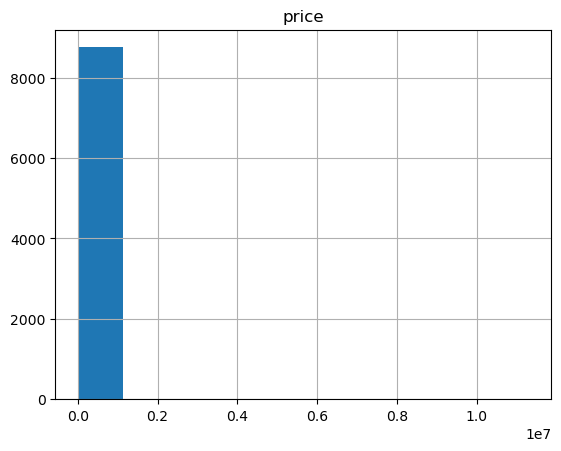

In [272]:
plt.title('price')
df['price'].hist(bins=10)

<Axes: >

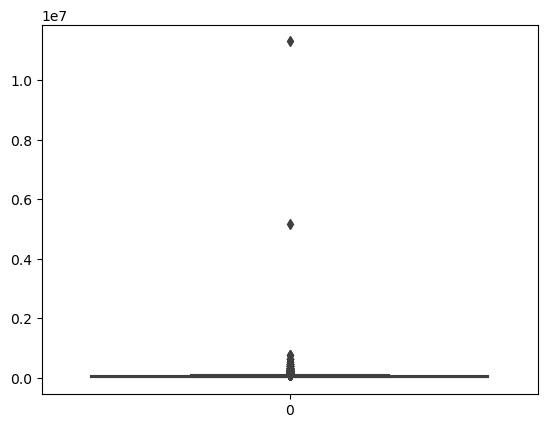

In [273]:
sns.boxplot(df.price)

<Axes: >

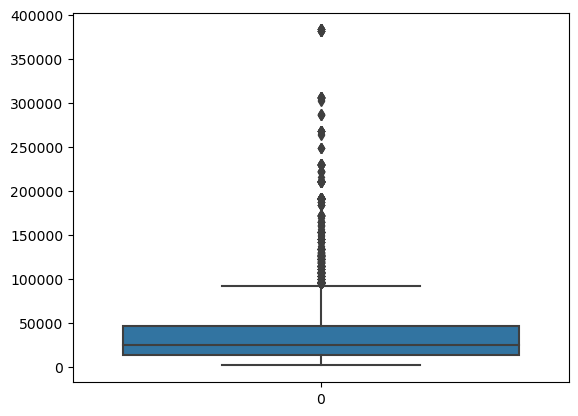

In [274]:
df = df[df.price< 400000]
sns.boxplot(df.price)

<Axes: title={'center': 'price'}>

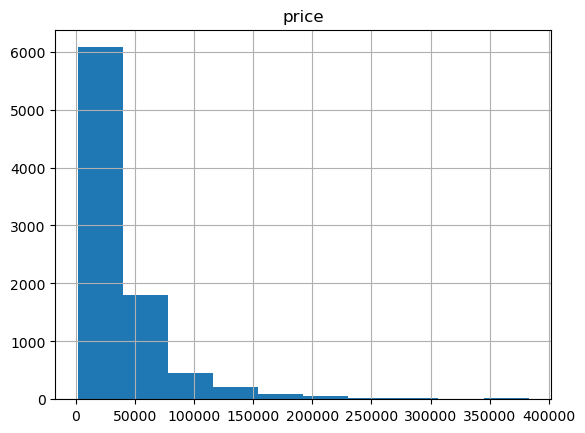

In [275]:
plt.title('price')
df['price'].hist(bins=10)

<Axes: >

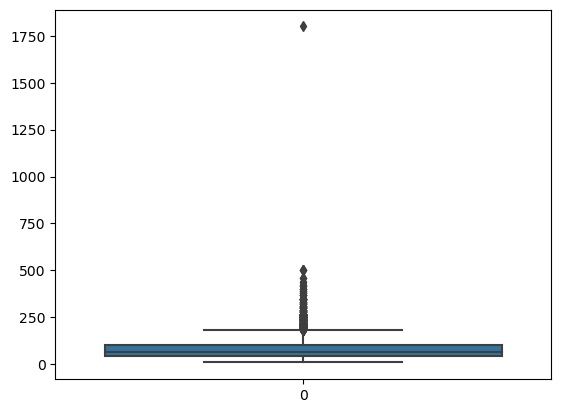

In [276]:
sns.boxplot(df.total_area)

<Axes: >

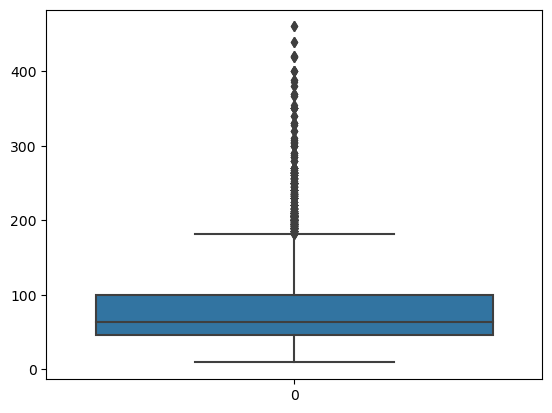

In [277]:
df = df[df.total_area <500]
sns.boxplot(df.total_area)

In [278]:
df.type3 = pd.to_numeric(df.type3, errors='coerce', downcast='integer') 

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8736 entries, 0 to 8758
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         8736 non-null   int32  
 1   dist1         8292 non-null   object 
 2   dist2         4583 non-null   object 
 3   dist3         8574 non-null   object 
 4   rooms         8736 non-null   int32  
 5   square        8736 non-null   object 
 6   floor         8734 non-null   float64
 7   type1         7294 non-null   object 
 8   type2         6476 non-null   object 
 9   type3         6739 non-null   float64
 10  metro         8736 non-null   int64  
 11  total_area    8736 non-null   float64
 12  living_area   5832 non-null   float64
 13  kitchen_area  8586 non-null   float64
 14  floor_total   8639 non-null   float64
dtypes: float64(6), int32(2), int64(1), object(6)
memory usage: 1.3+ MB


In [280]:
df.dropna(subset = ['dist3', 'floor'], inplace=True, ignore_index=True)

In [281]:
categorical = ['dist3', 'metro']
numerical = ['rooms', 'floor', 'total_area', 'living_area', 'kitchen_area', 'floor_total', 'type3']
for val in categorical:
    print(df[val].value_counts(), '\n')

dist3
Печерський        2267
Шевченківський    1276
Голосіївський     1138
Дарницький         920
Дніпровський       693
Солом'янський      634
Оболонський        502
Подільський        435
Святошинський      396
Деснянський        311
Name: count, dtype: int64 

metro
1    4445
0    4127
Name: count, dtype: int64 



In [183]:
metro = ['Академмістечко', 'Арсенальна', 'Берестейська', 'Бориспільська','Васильківська','Видубичі','Вирлиця', 'Виставковий центр', 
         'Вокзальна', 'Героїв Дніпра', 'Голосіївська','Гідропарк','Дарниця','Деміївська','Дніпро','Дорогожичі','Житомирська',
         'Звіринецька (Дружби народів)','Золоті ворота','Кловська','Контрактова площа','Либідська',"Лук'янівська",'Лівобережна',
         'Лісова','Майдан Незалежності','Мінська','Нивки','Оболонь','Олімпійська','Осокорки','Палац спорту','Палац Україна',
         'Печерська','Площа Українських Героїв (Площа Льва Толстого)','Позняки','Політехнічний інститут','Поштова площа','Святошин',
         'Сирець','Славутич','Тараса Шевченка','Театральна','Теремки','Університет','Харківська','Хрещатик',
         'Чернігівська','Шулявська','Іподром']

In [ ]:
## Train test split

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8572 entries, 0 to 8571
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         8572 non-null   int32  
 1   dist1         8128 non-null   object 
 2   dist2         4460 non-null   object 
 3   dist3         8572 non-null   object 
 4   rooms         8572 non-null   int32  
 5   square        8572 non-null   object 
 6   floor         8572 non-null   float64
 7   type1         7271 non-null   object 
 8   type2         6455 non-null   object 
 9   type3         6665 non-null   float64
 10  metro         8572 non-null   int64  
 11  total_area    8572 non-null   float64
 12  living_area   5711 non-null   float64
 13  kitchen_area  8423 non-null   float64
 14  floor_total   8477 non-null   float64
dtypes: float64(6), int32(2), int64(1), object(6)
memory usage: 937.7+ KB


In [283]:
df.drop('living_area', axis = 1, inplace = True)
df.type3 = df.type3.fillna(df.type3.median())
df.kitchen_area = df.kitchen_area.fillna(df.kitchen_area.median())
df.floor_total = df.floor_total.fillna(df.floor_total.median())

In [284]:
 del numerical[3]

In [285]:
from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=4)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=4)

## EDA

In [54]:
### Target feature

<Axes: title={'center': 'price'}>

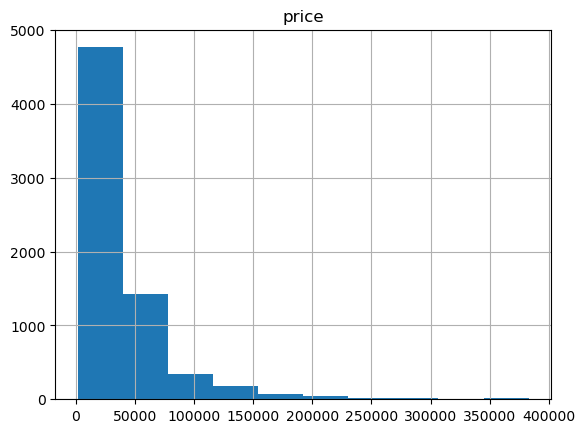

In [286]:
plt.title('price')
df_train_full['price'].hist(bins=10)

In [ ]:
### Categorical features

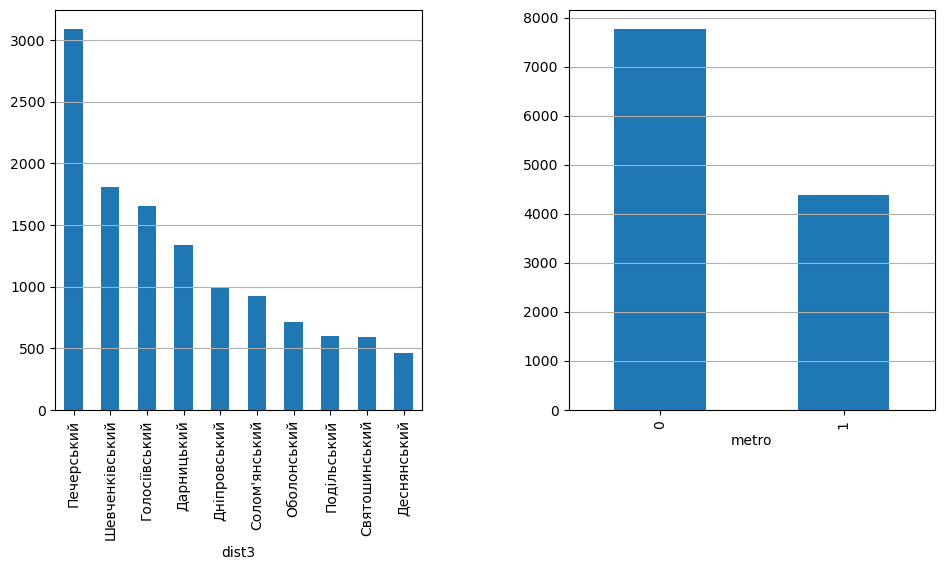

In [142]:
plt.figure(figsize=(11, 5))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
for i in range(0, len(categorical)):
    plt.subplot(1, 2, i+1)
    df_train_full[categorical[i]].value_counts().plot.bar()
    plt.grid(axis='y')

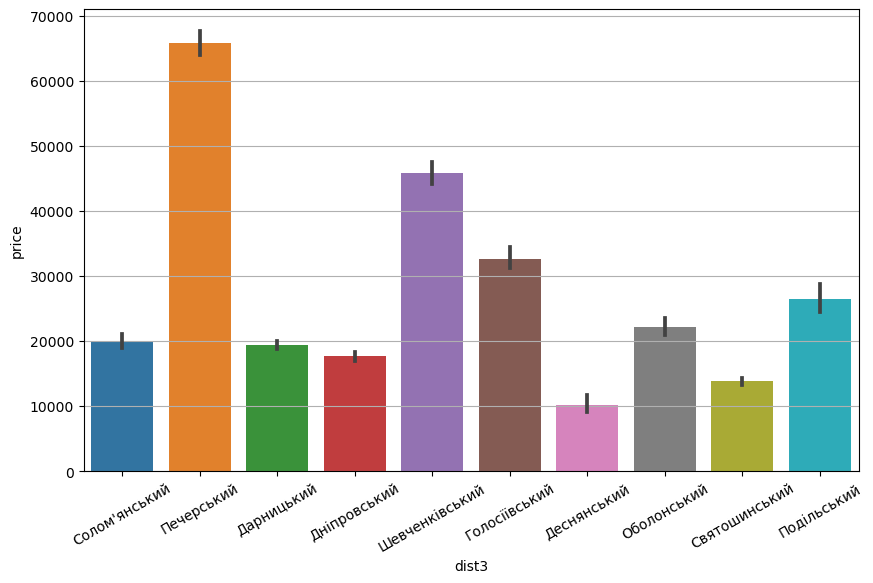

In [143]:
plt.figure(figsize = (10, 6))
g = sns.barplot(x='dist3', y='price', data=df)
plt.grid(axis='y')
#ticks = g.set_xticklabels(rotation=90)
ticks = plt.xticks(rotation=30)

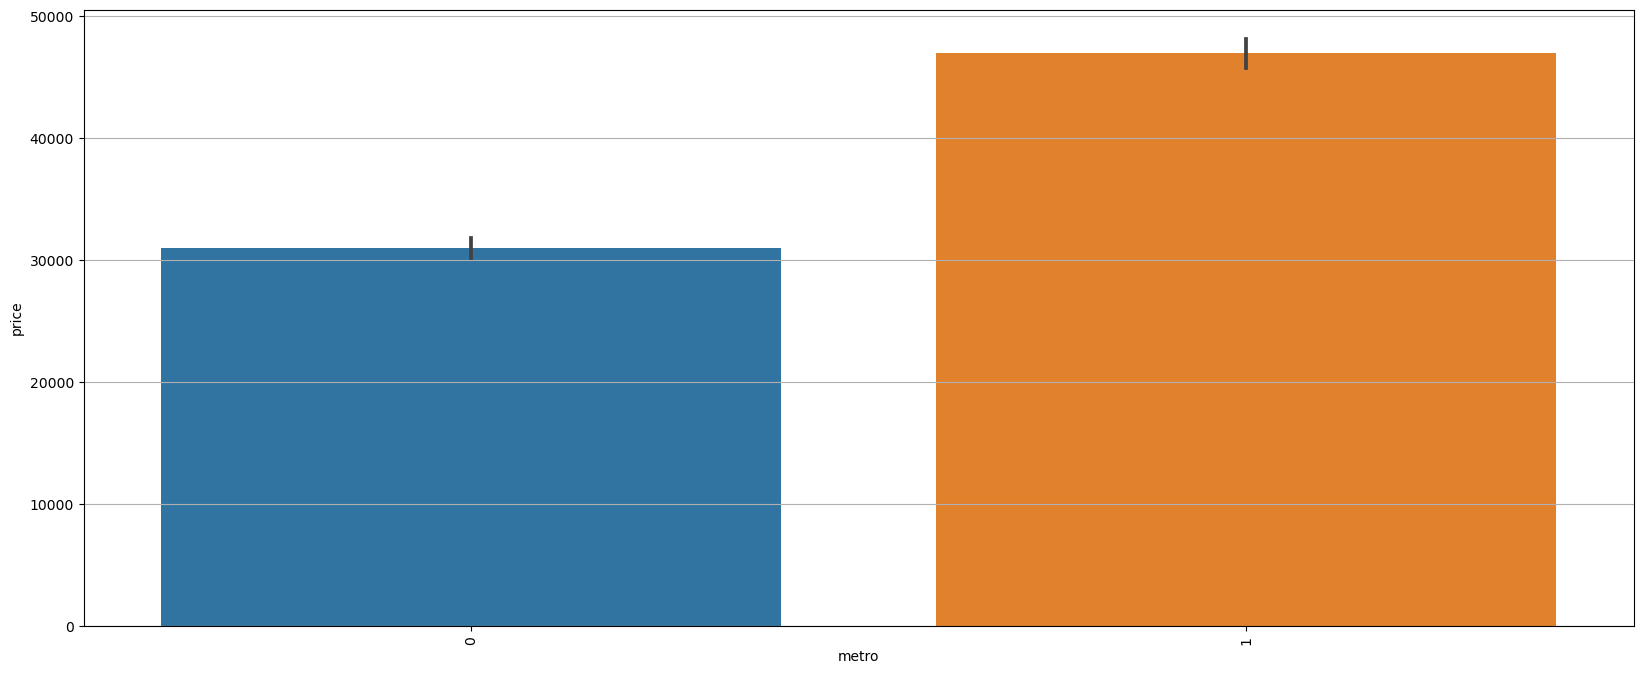

In [144]:
plt.figure(figsize=(20, 8))
plt.grid(axis='y')
sns.barplot(x='metro', y= 'price', data=df)

ticks = plt.xticks(rotation=90)

<Axes: xlabel='price', ylabel='total_area'>

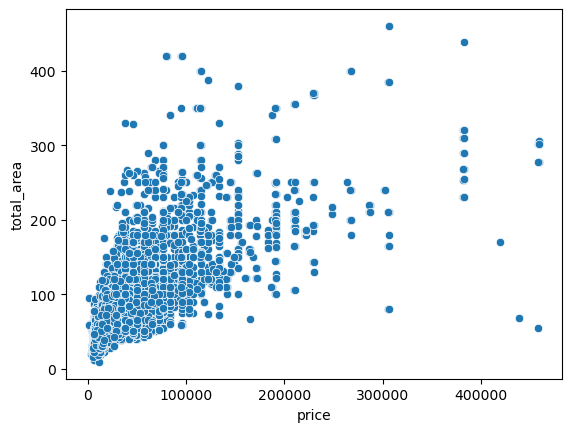

In [145]:
sns.scatterplot(x=df_train_full.price, y =df_train_full.total_area)

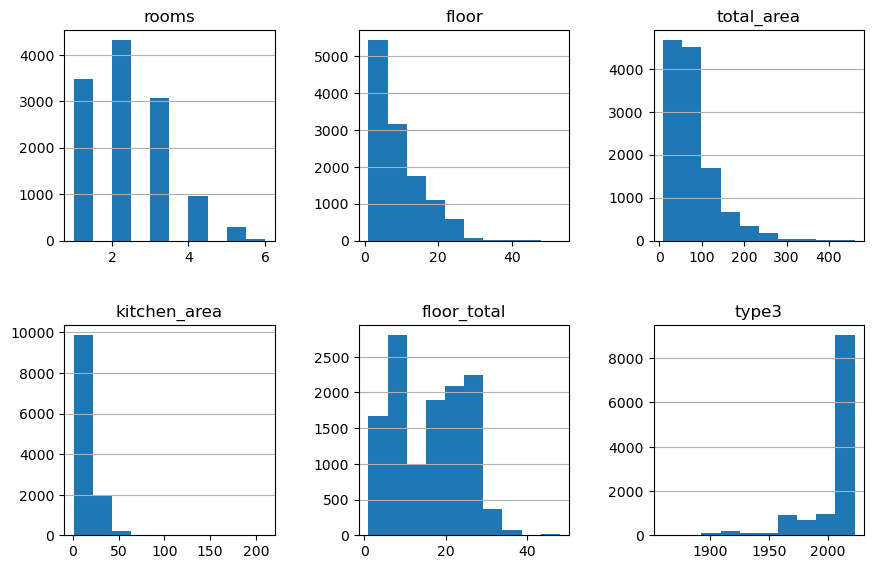

In [146]:
plt.figure(figsize=(10, 10))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
for i in range(0, len(numerical)):
    plt.subplot(3, 3, i+1)
    plt.title(numerical[i])
    df_train_full[numerical[i]].hist()
    plt.grid(axis='x')

In [126]:
### Feature importance

In [170]:
from sklearn.metrics import mutual_info_score
def mutual_info(series):
    return mutual_info_score(series, df_train_full.price)

In [287]:
mi = df_train_full[categorical].apply(mutual_info)
mi.sort_values(ascending=False)

dist3    0.504749
metro    0.153049
dtype: float64

In [63]:
#### Correlation

<Axes: >

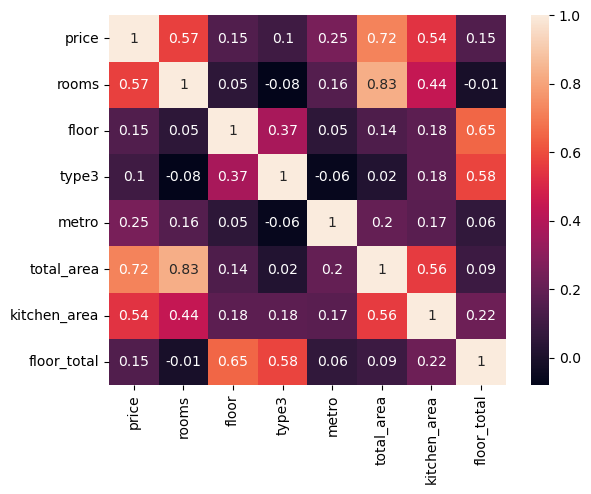

In [288]:
corr_matrix = df_train_full.corr(numeric_only=True).round(2)
sns.heatmap(corr_matrix, annot=True)

In [173]:
df.head()

,price,dist1,dist2,dist3,rooms,square,floor,type1,type2,type3,metro,total_area,kitchen_area,floor_total
0,26000,ЖК Місце мрії,Шулявка,Солом'янський,2,60 / 35 / 15,14.0,спец. проект,монолітно-каркасний,2009,1,60.0,15.0,25.0
1,95750,ЖК Central Park,Нова забудова,Печерський,3,131 / 80 / 15,10.0,NaN,NaN,2007,1,131.0,15.0,25.0
2,57450,ЖК Новопечерські Липки,Чорна Гора,Печерський,2,87 / 41 / 17,2.0,спец. проект,монолітно-каркасний,2013,1,87.0,17.0,23.0
3,8000,Харьківський,NaN,Дарницький,1,40 / 18 / 9,3.0,серія Т,утеплена панель,1983,1,40.0,9.0,16.0
4,15000,ЖМ Патріотика,Осокорки,Дарницький,1,38 / 12 / 16,15.0,спец. проект,панельні,2018,1,38.0,16.0,25.0


In [289]:
y_train= df_train['price']
y_val =df_val['price']

X_train = df_train.drop(['price', 'dist1', 'dist2', 'square', 'square', 'type1', 'type2'], axis=1)
X_val = df_val.drop(['price', 'dist1', 'dist2', 'square', 'square', 'type1', 'type2'], axis=1)

In [290]:
y_train = np.log(y_train)
y_val = np.log(y_val)

<Axes: >

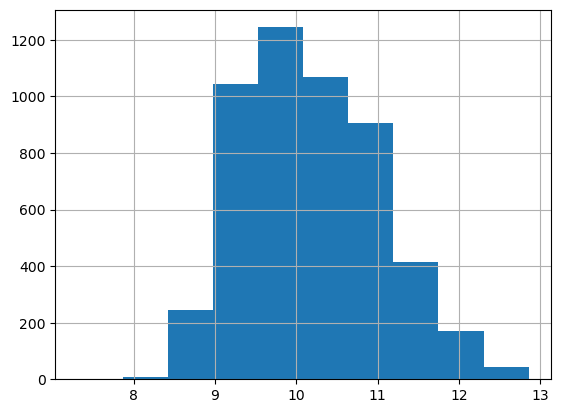

In [291]:
y_train.hist()

In [ ]:
### Encoding categorical features

In [ ]:
#### Encoding nominal features with DictVectorizer

In [292]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

train_dict = X_train.to_dict(orient='records')

val_dict = X_val.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

X_val = dv.transform(val_dict)

In [ ]:
### Scaling

In [293]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [294]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
val_results = pd.DataFrame(columns=['model', 'params', 'rmse', 'r2', 'train_r2'])
model_results = pd.DataFrame(columns=['params',  'rmse', 'r2', 'train_r2'])

In [295]:
from sklearn.linear_model import Lasso
for a in [0.0001, 0.001, 0.01, 0.1]:
    ls = Lasso(random_state=4, alpha = a)
    ls.fit(X_train, y_train)
    y_pred = ls.predict(X_val)
    y_train_pred = ls.predict(X_train)
    rmse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    r2_train = r2_score(y_train, y_train_pred)
    model_results.loc[len(model_results)] = ['alpha=' +str(a), rmse, r2, r2_train]

D:\anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.386e+00, tolerance: 3.589e-01
  model = cd_fast.enet_coordinate_descent(


In [296]:
model_results

,params,rmse,r2,train_r2
0,alpha=0.0001,0.176911,0.745273,0.760238
1,alpha=0.001,0.176896,0.745294,0.760216
2,alpha=0.01,0.178229,0.743376,0.758693
3,alpha=0.1,0.240012,0.654417,0.676268


In [297]:
val_results.loc[len(val_results)] = ['Lasso Regression']+model_results.iloc[0].to_list()

In [298]:
from sklearn.linear_model import Ridge
model_results.drop(model_results.index , inplace=True)

for a in [0.001, 0.01, 0.1, 1, 1.2, 1.5]:
    rd = Ridge(random_state=4, alpha = a)
    rd.fit(X_train, y_train)
    y_pred = rd.predict(X_val)
    y_train_pred = rd.predict(X_train)
    rmse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    r2_train = r2_score(y_train, y_train_pred)
    model_results.loc[len(model_results)] = ['alpha=' +str(a), rmse, r2, r2_train]

In [299]:
model_results

,params,rmse,r2,train_r2
0,alpha=0.001,0.176916,0.745266,0.760238
1,alpha=0.01,0.176916,0.745266,0.760238
2,alpha=0.1,0.176916,0.745266,0.760238
3,alpha=1,0.176916,0.745265,0.760238
4,alpha=1.2,0.176916,0.745265,0.760238
5,alpha=1.5,0.176917,0.745265,0.760238


In [300]:
val_results.loc[len(val_results)] = ['Lasso Regression']+model_results.iloc[5].to_list()

In [301]:
from sklearn.tree import DecisionTreeRegressor
model_results.drop(model_results.index , inplace=True)

for depth in [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 17, 20, None]:
    dt = DecisionTreeRegressor()
    dt = DecisionTreeRegressor(max_depth=depth, random_state=4)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_val)
    y_train_pred = dt.predict(X_train)
    rmse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    r2_train = r2_score(y_train, y_train_pred)
    model_results.loc[len(model_results)] = ['max_depth=' +str(depth), rmse, r2, r2_train]

In [302]:
model_results.sort_values(by=['r2'], ascending=False)

,params,rmse,r2,train_r2
7,max_depth=9,0.148295,0.786475,0.878804
8,max_depth=10,0.148847,0.785682,0.901157
6,max_depth=8,0.155479,0.776131,0.853604
5,max_depth=7,0.158863,0.771260,0.826429
4,max_depth=6,0.165244,0.762072,0.799705
12,max_depth=None,0.171252,0.753421,0.999843
9,max_depth=15,0.172062,0.752255,0.979305
11,max_depth=20,0.172388,0.751785,0.998130
10,max_depth=17,0.173195,0.750623,0.991737
3,max_depth=5,0.182628,0.737041,0.767933


In [303]:
val_results.loc[len(val_results)] = ['DecisionTreeRegressor']+model_results.iloc[9].to_list()

In [304]:
from sklearn.ensemble import RandomForestRegressor
model_results.drop(model_results.index , inplace=True)
for depth in [2, 3, 4, 5, 6, 7, 8, 9, 10]:
    for n in range(10, 200, 10):
        rf = RandomForestRegressor(n_estimators=n, max_depth=depth, random_state=4,)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        y_train_pred = rf.predict(X_train)
        rmse = mean_squared_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)
        r2_train = r2_score(y_train, y_train_pred)
        model_results.loc[len(model_results)] = ['max_depth='+ str(depth) +' n_estimators=' +str(n), rmse, r2, r2_train]

In [305]:
model_results.sort_values(by=['r2'], ascending=False)

,params,rmse,r2,train_r2
170,max_depth=10 n_estimators=190,0.107635,0.845021,0.922243
169,max_depth=10 n_estimators=180,0.107888,0.844656,0.922176
168,max_depth=10 n_estimators=170,0.107999,0.844496,0.922282
166,max_depth=10 n_estimators=150,0.108046,0.844429,0.922118
167,max_depth=10 n_estimators=160,0.108096,0.844357,0.922186
...,...,...,...,...
2,max_depth=2 n_estimators=30,0.295404,0.574660,0.608797
6,max_depth=2 n_estimators=70,0.295664,0.574286,0.608528
3,max_depth=2 n_estimators=40,0.296197,0.573517,0.607206
0,max_depth=2 n_estimators=10,0.296955,0.572426,0.608042


In [306]:
val_results.loc[len(val_results)] = ['RandomForestRegressor']+model_results.iloc[165].to_list()

In [192]:
from sklearn.ensemble import GradientBoostingRegressor
model_results.drop(model_results.index , inplace=True)
for depth in [8, 9, 10, 11, 12, 13, 14, 15]:
    for n in[200, 250, 300, 320, 350]:
        for l in [0.01, 0.1, 1]:
            gb = GradientBoostingRegressor(learning_rate=l, n_estimators=n, max_depth=depth, random_state=4)
            gb.fit(X_train, y_train)
            #y_pred = gb.predict(X_val)
            y_pred = gb.predict(X_val)
            y_train_pred = gb.predict(X_train)
            rmse = mean_squared_error(y_val, y_pred)
            r2 = r2_score(y_val, y_pred)
            r2_train = r2_score(y_train, y_train_pred)
            model_results.loc[len(model_results)] = ['max_depth='+ str(depth) +' n_estimators=' +str(n) +
                                                     ' learning_rate'+str(l), rmse, r2, r2_train]


In [193]:
model_results.sort_values(by=['r2'], ascending=False)

,params,rmse,r2,train_r2
43,max_depth=10 n_estimators=350 learning_rate0.1,0.077349,0.889907,0.997231
13,max_depth=8 n_estimators=350 learning_rate0.1,0.077355,0.889899,0.984660
40,max_depth=10 n_estimators=320 learning_rate0.1,0.077393,0.889845,0.996856
19,max_depth=9 n_estimators=250 learning_rate0.1,0.077413,0.889815,0.988601
22,max_depth=9 n_estimators=300 learning_rate0.1,0.077469,0.889736,0.991889
...,...,...,...,...
2,max_depth=8 n_estimators=200 learning_rate1,0.153020,0.782203,0.998425
5,max_depth=8 n_estimators=250 learning_rate1,0.153205,0.781939,0.998471
8,max_depth=8 n_estimators=300 learning_rate1,0.153250,0.781874,0.998480
14,max_depth=8 n_estimators=350 learning_rate1,0.153275,0.781840,0.998481


In [194]:
val_results.loc[len(val_results)] = ['GradientBoostingRegressor']+model_results.iloc[43].to_list()

IndexError: single positional indexer is out-of-bounds

In [87]:
val_results

,model,params,rmse,r2,train_r2
0,Lasso Regression,alpha=0.001,0.163773,0.740959,0.746618
1,Lasso Regression,alpha=1,0.163819,0.740886,0.746642
2,DecisionTreeRegressor,max_depth=15,0.133137,0.789416,0.960344
3,RandomForestRegressor,max_depth=10 n_estimators=140,0.104831,0.834187,0.894703
4,GradientBoostingRegressor,max_depth=9 n_estimators=300 learning_rate0.1,0.075654,0.880337,0.992886


In [87]:
val_results

,model,params,rmse,r2,train_r2
0,Lasso Regression,alpha=0.001,0.159947,0.765080,0.751894
1,Lasso Regression,alpha=1.5,0.159954,0.765071,0.751911
2,DecisionTreeRegressor,max_depth=10,0.129353,0.810016,0.899075
3,RandomForestRegressor,max_depth=10 n_estimators=70,0.099087,0.854468,0.921124
4,GradientBoostingRegressor,max_depth=9 n_estimators=200 learning_rate0.1,0.082295,0.879131,0.994978


In [195]:
val_results

,model,params,rmse,r2,train_r2
0,Lasso Regression,alpha=0.0001,0.175314,0.750470,0.749254
1,Lasso Regression,alpha=1.5,0.175310,0.750477,0.749255
2,DecisionTreeRegressor,max_depth=15,0.139914,0.800856,0.958686
3,RandomForestRegressor,max_depth=10 n_estimators=140,0.106739,0.848075,0.894696
4,GradientBoostingRegressor,max_depth=10 n_estimators=350 learning_rate0.1,0.077349,0.889907,0.997231


In [200]:
y_train= df_train_full['price']
X_train = df_train_full.drop(['price', 'dist1', 'dist2', 'square', 'square', 'type1', 'type2'], axis=1)

y_test= df_test['price']
X_test = df_test.drop(['price', 'dist1', 'dist2', 'square', 'square', 'type1', 'type2'], axis=1)

dv = DictVectorizer(sparse=False)

train_dict = X_train.to_dict(orient='records')
test_dict = X_test.to_dict(orient='records')

X_train = dv.fit_transform(train_dict)
X_test = dv.transform(test_dict)

In [201]:
y_train = np.log(y_train)
y_test = np.log(y_test)

In [202]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [204]:
gb = GradientBoostingRegressor(learning_rate=0.1, n_estimators=350, max_depth=10, random_state=4)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
y_train_pred = gb.predict(X_train)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_train_pred)
print('rmse: ', rmse, 'r2: ',  r2, 'r2_train: ',  r2_train)

rmse:  0.05905418694877317 r2:  0.9097938020532623 r2_train:  0.9965551461048495
